In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9945.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156972   
std    2885.163629  32063.693350    623.245101     2.225110     0.206668   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [ ]:
def print_missing_values(df):
    missing_values = df.isnull().sum()
    print(missing_values)

def visualize_box_plot(df):
  numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

  # Creating box plots for each numerical column
  for column in numerical_columns:
      plt.figure(figsize=(8, 6))  # Set figure size
      sns.boxplot(x=df[column])  # Create box plot
      plt.xlabel(column)  # Set x-axis label
      plt.title(f'Box Plot of {column}')  # Set plot title
      plt.show()  # Show plot

def normalize_df(date):
  # Initialize the MinMaxScaler
  scaler = MinMaxScaler()

  # Fit and transform the 'Sales' and 'Profit' columns
  df[['Sales', 'Profit']] = scaler.fit_transform(df[['Sales', 'Profit']])

  # Display the first few rows of the dfFrame after normalization
  print(df.head())

def handle_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR


    df.loc[df[column] < lower_fence, column] = lower_fence
    df.loc[df[column] > upper_fence, column] = upper_fence


In [ ]:
df.drop(df.columns[0], axis=1, inplace= True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
print_missing_values(df)

Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64


In [ ]:
mode = df['Ship Mode'].mode().iloc[0]
df['Ship Mode'].fillna(mode , inplace= True)

# mean_discount = df['Discount'].mean()
df['Discount'].fillna(0, inplace=True)

In [ ]:
print_missing_values(df)

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
df.drop_duplicates()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,01/21/2014,01/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,02/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,02/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,02/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


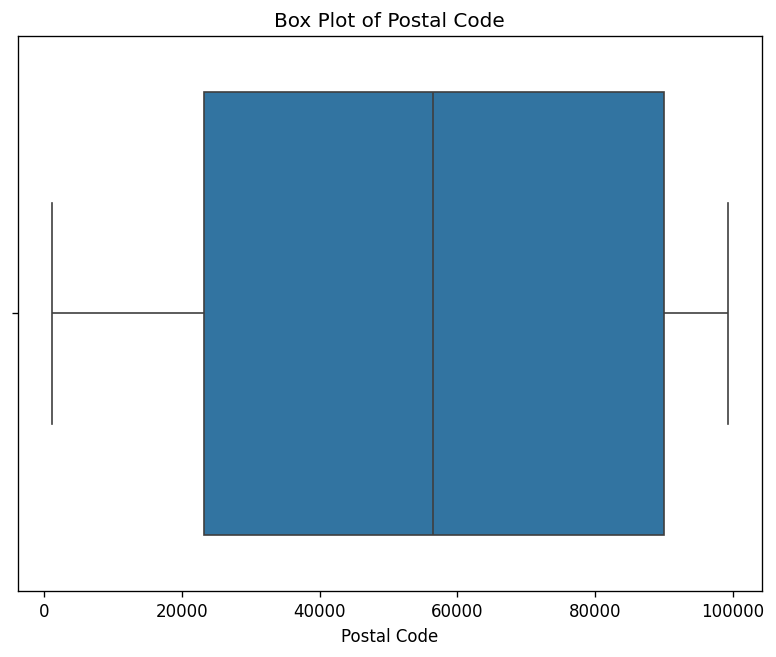

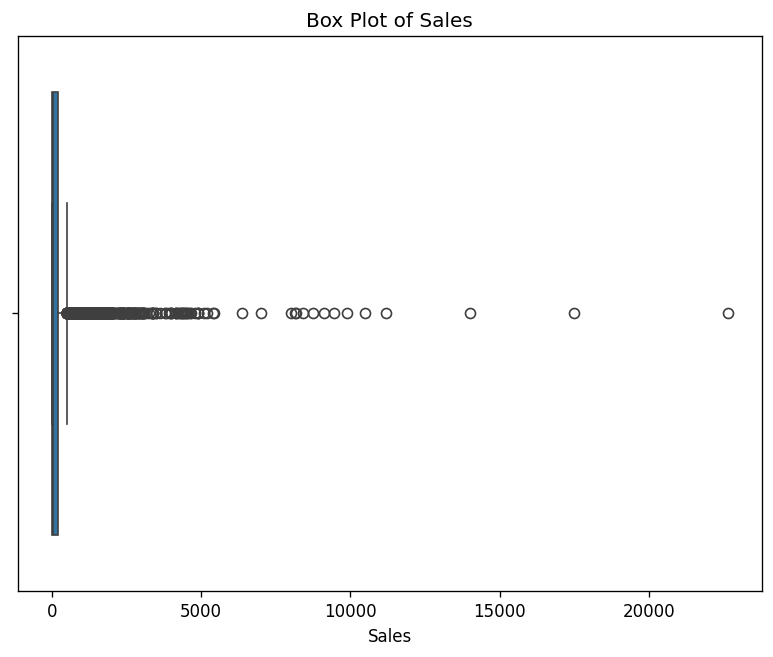

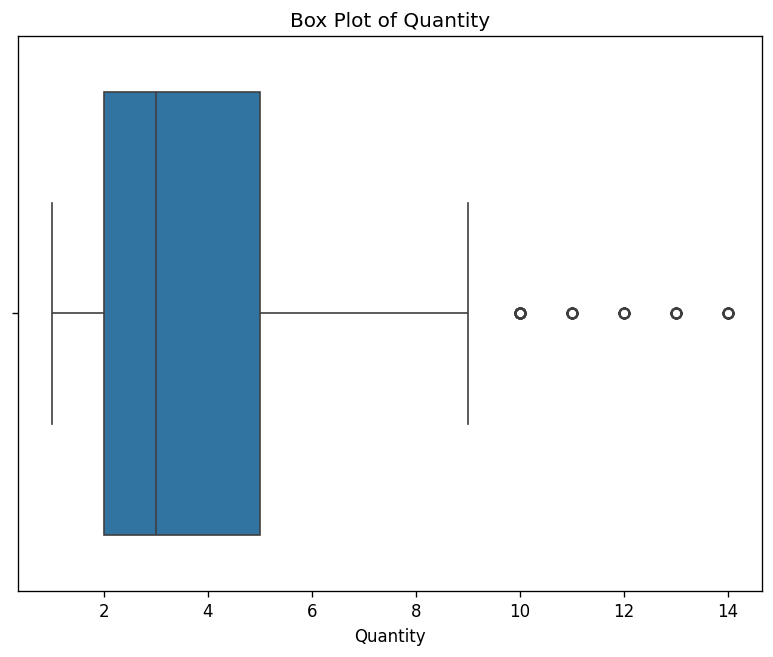

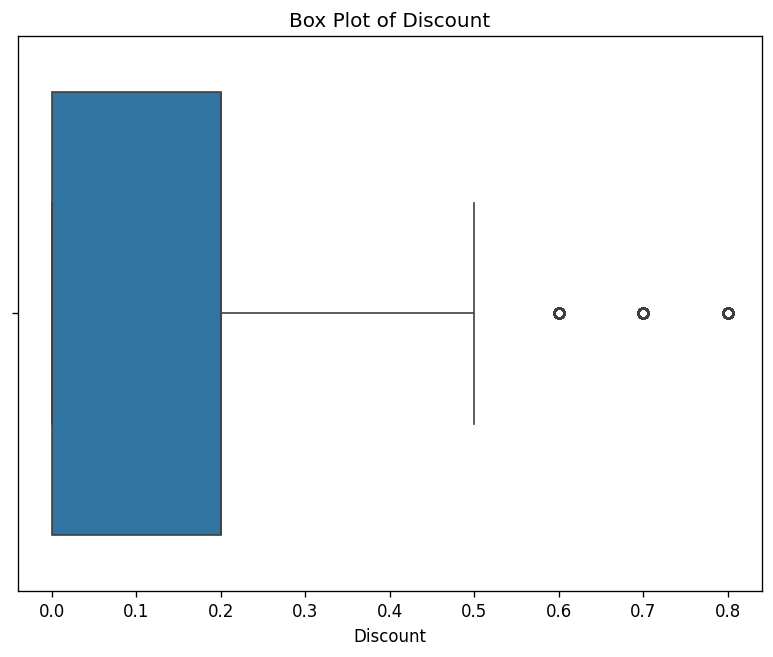

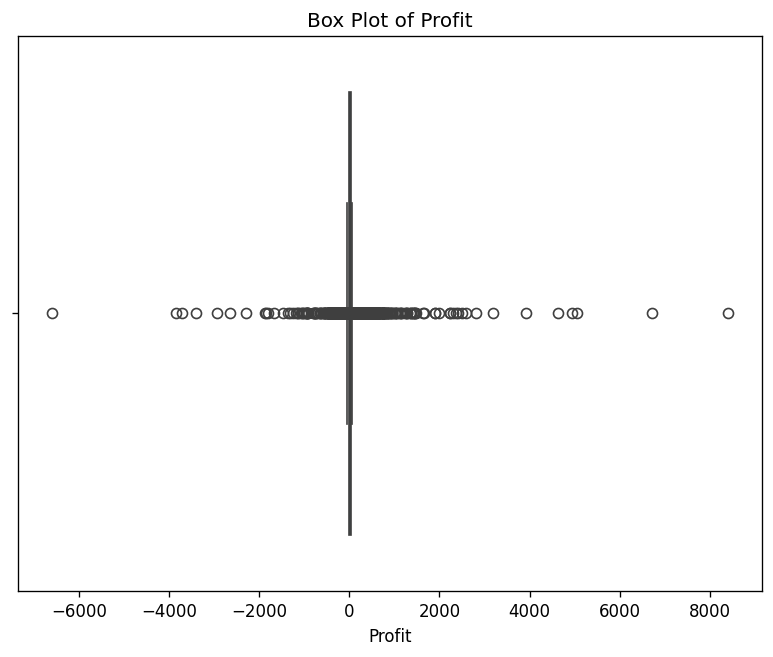

In [ ]:
# Visualize before handling outliers
visualize_box_plot(df)

In [ ]:
for column in df.select_dtypes(include=['number']):
    handle_outliers_iqr(df, column)

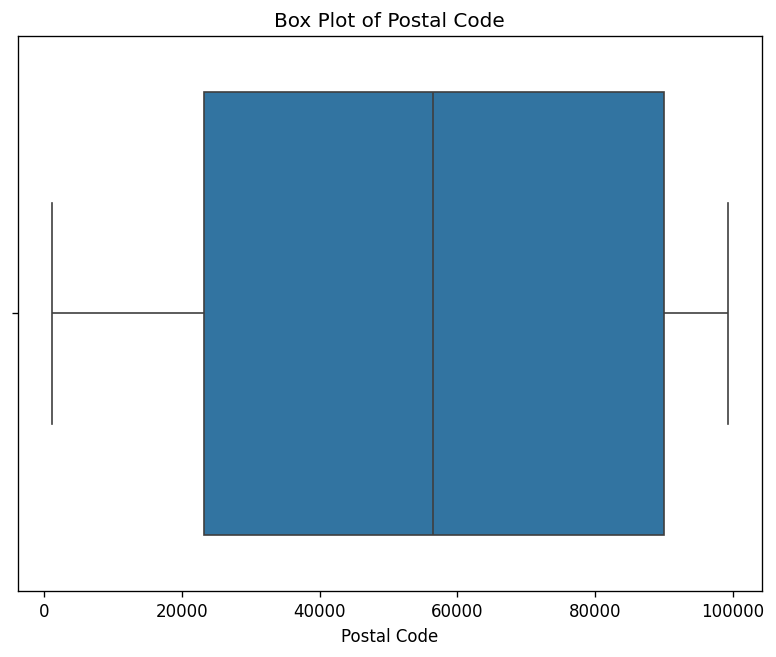

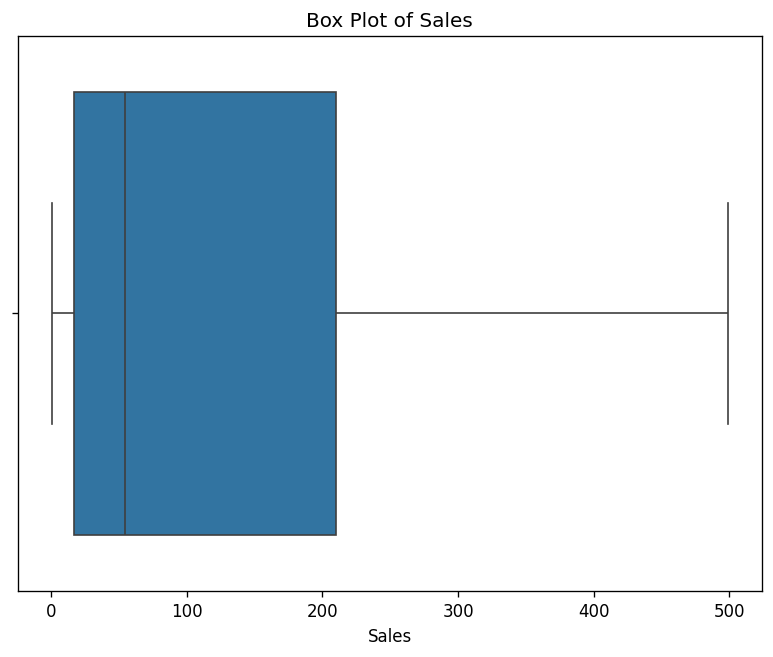

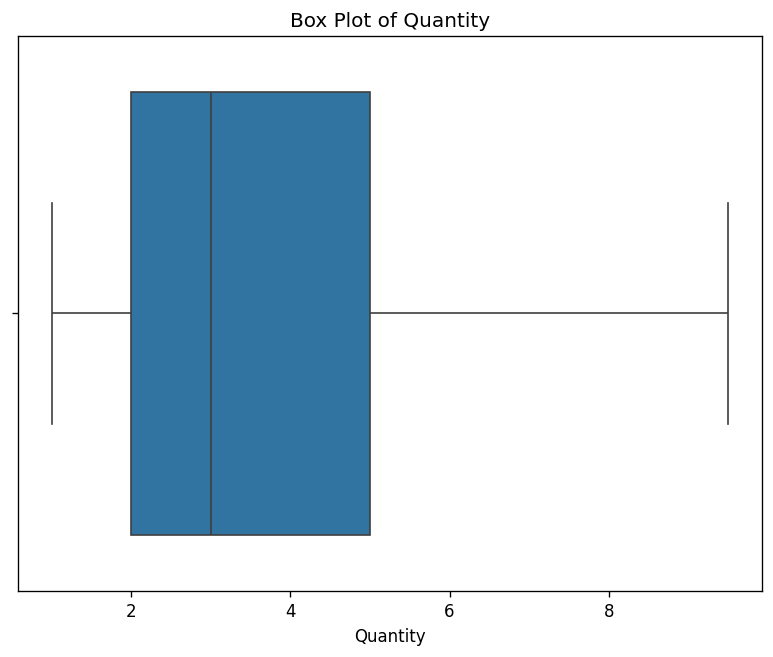

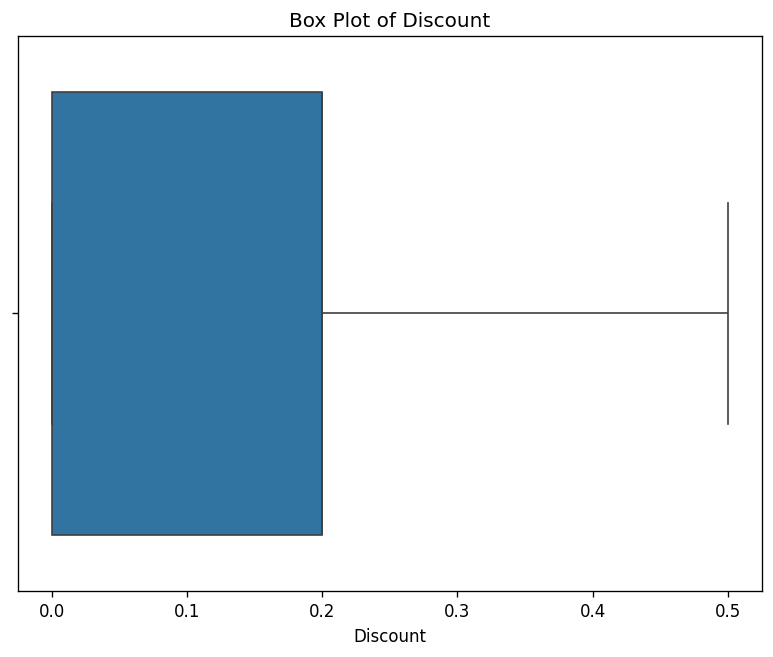

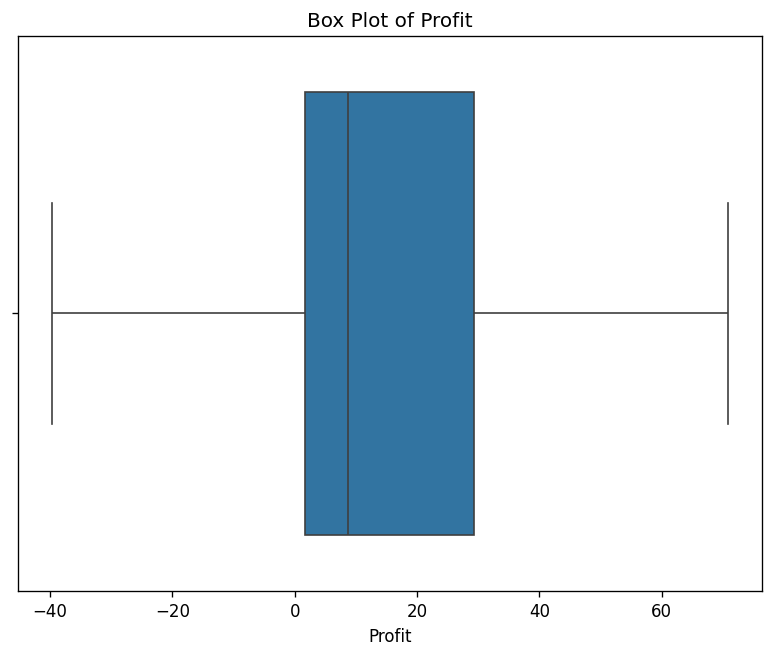

In [ ]:
#Visulize after handling outliers
visualize_box_plot(df)

In [ ]:
print(df.count())

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Filter out rows where Ship Date is smaller than Order Date
df = df[df['Ship Date'] >= df['Order Date']]

print(df.count())

Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64


In [ ]:
# Define the file path for the CSV file
output_file_path = '/content/CleanedWalmartdfset.csv'

# Export the dfFrame to a CSV file
df.to_csv(output_file_path, index=False)

In [ ]:
import pandas as pd


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the difference between ship date and order date in days
df['Days_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Select features and target variable
features = df[['Ship Mode', 'Segment', 'Country','Region', 'Category', 'Quantity','Sub-Category','Discount','Profit','Days_to_Ship']]
target = df['Sales']

In [ ]:
# Convert categorical variables into dummy/indicator variables
features = pd.get_dummies(features)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6376385990127516


#Decision Tree Regessor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR= DecisionTreeRegressor(max_depth=5)

In [ ]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred=DTR.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.76575504302593

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred=RFR.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8493418832551013

time series

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

order date as index

In [ ]:
# Selecting only 'Order Date' and 'Sales' columns
df = df[['Order Date', 'Sales']]

# Displaying the first few rows to verify the result
print(df.head())

  Order Date    Sales
0 2016-11-08  261.960
1 2016-11-08  498.930
2 2016-06-12   14.620
3 2015-10-11  498.930
4 2015-10-11   22.368


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA



# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Month' column as index
df.set_index('Order Date', inplace=True)

df.head()

,Sales
Order Date,
2016-11-08,261.960
2016-11-08,498.930
2016-06-12,14.620
2015-10-11,498.930
2015-10-11,22.368


In [ ]:
# Create a time series for sales
sales_time_series = df['Sales']

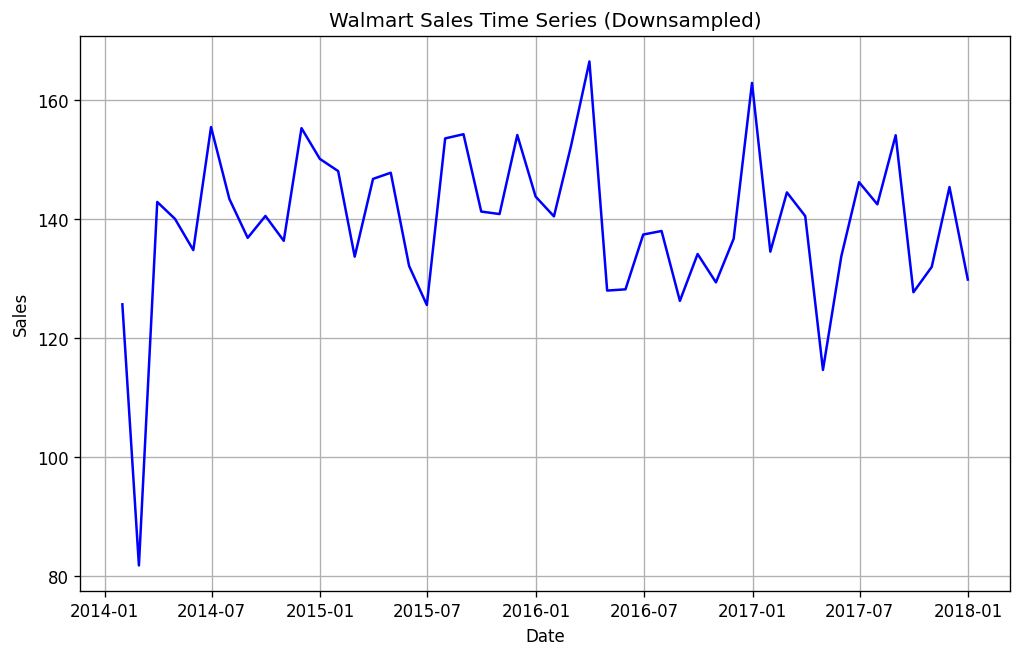

In [ ]:
# step 1

# Downsample the time series to reduce the number of data points
sales_time_series_downsampled = sales_time_series.resample('M').mean().to_frame()
# sales_time_series_downsampled

# # Visualize the downsampled time series
plt.figure(figsize=(10, 6))
# index is the x axis , y is the values of the data frame which is the sales
plt.plot(sales_time_series_downsampled.index,sales_time_series_downsampled['Sales'] , color='blue')
plt.title('Walmart Sales Time Series (Downsampled)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


**step 2: Stationarize the series**

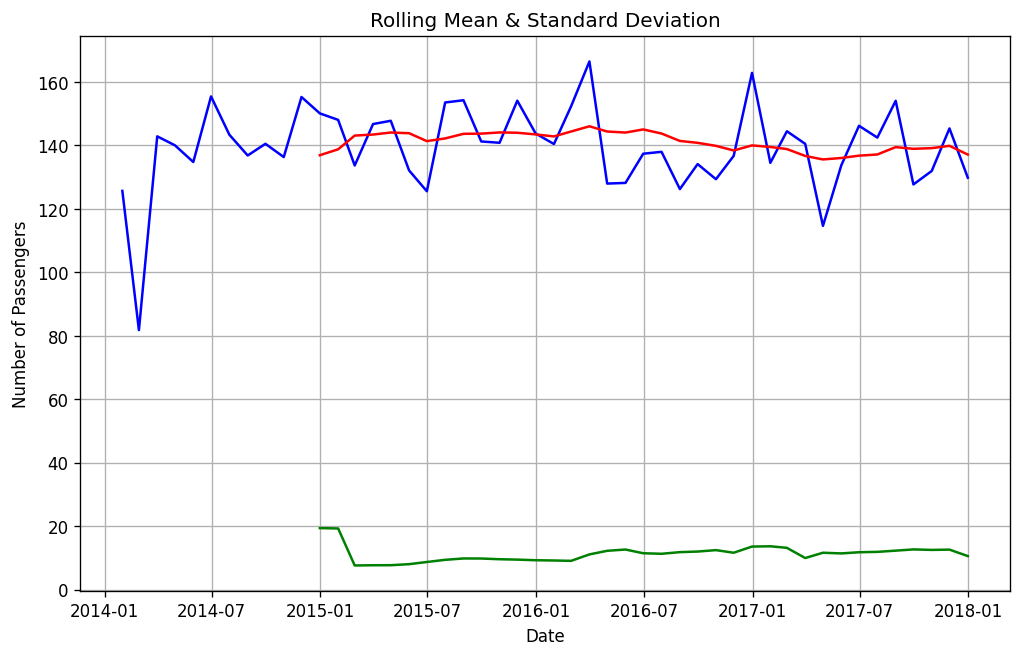

ADF Statistic: -7.040810308170457
p-value: 5.853489199192222e-10
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675


In [ ]:
# Step 2: Stationarize the series
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    # plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


# Apply stationarize_series function
stationarize_series(sales_time_series_downsampled)

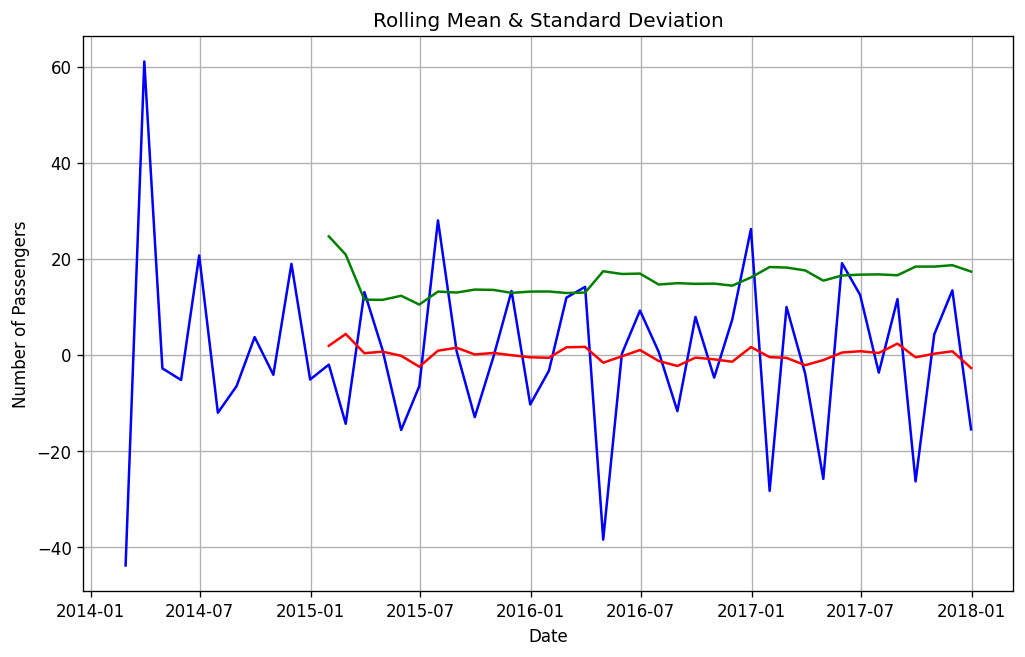

ADF Statistic: -9.180403819080333
p-value: 2.2600315481924624e-15
Critical Values:
	1%: -3.584828853223594
	5%: -2.9282991495198907
	10%: -2.6023438271604937


In [ ]:
stationarize_series(sales_time_series_downsampled.diff().dropna())

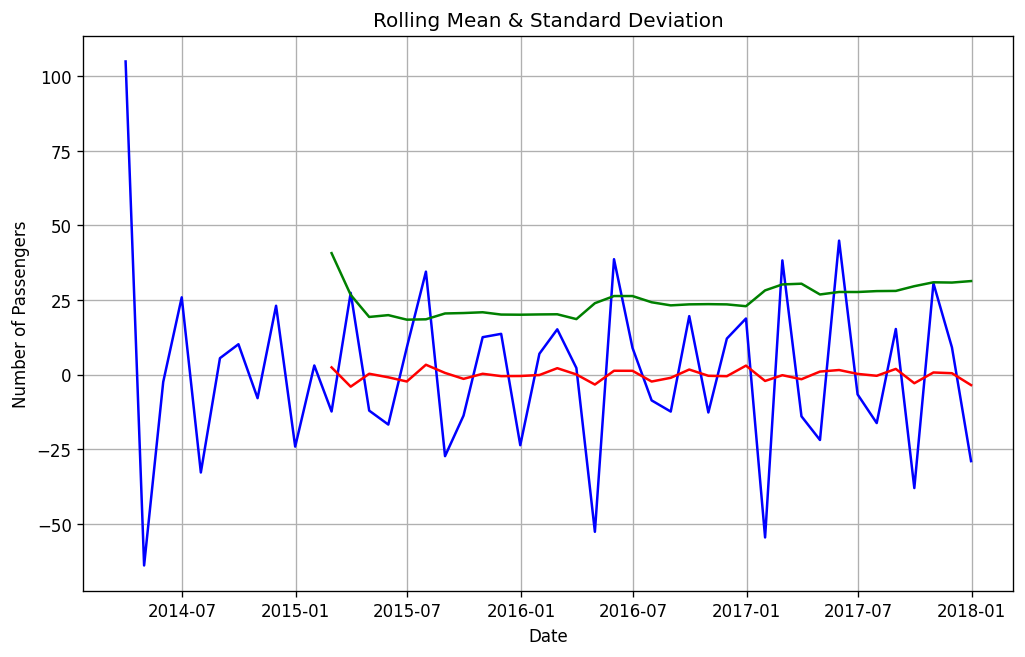

ADF Statistic: -5.963413122105151
p-value: 2.013917846874798e-07
Critical Values:
	1%: -3.610399601308181
	5%: -2.939108945868946
	10%: -2.6080629651545038


In [ ]:
stationarize_series(sales_time_series_downsampled.diff().diff().dropna())

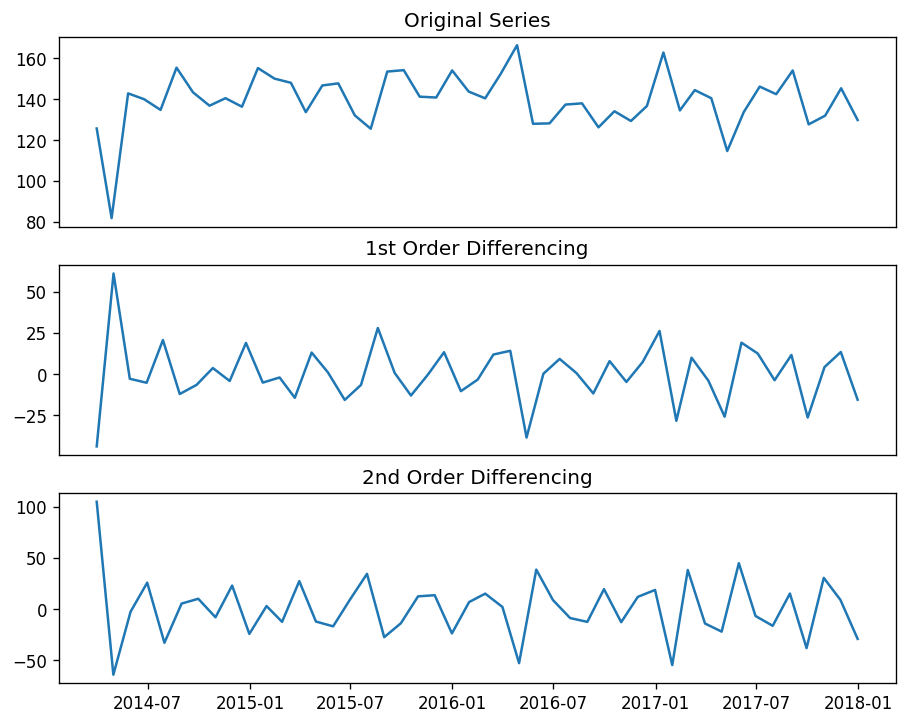

In [ ]:
# Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sales_time_series_downsampled.Sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(sales_time_series_downsampled.Sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(sales_time_series_downsampled.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

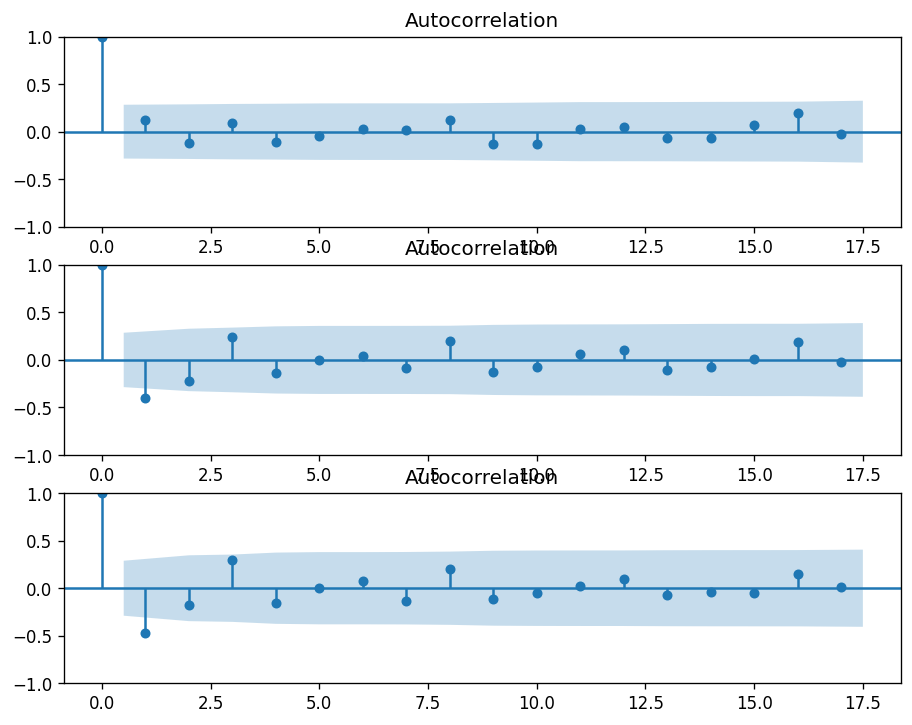

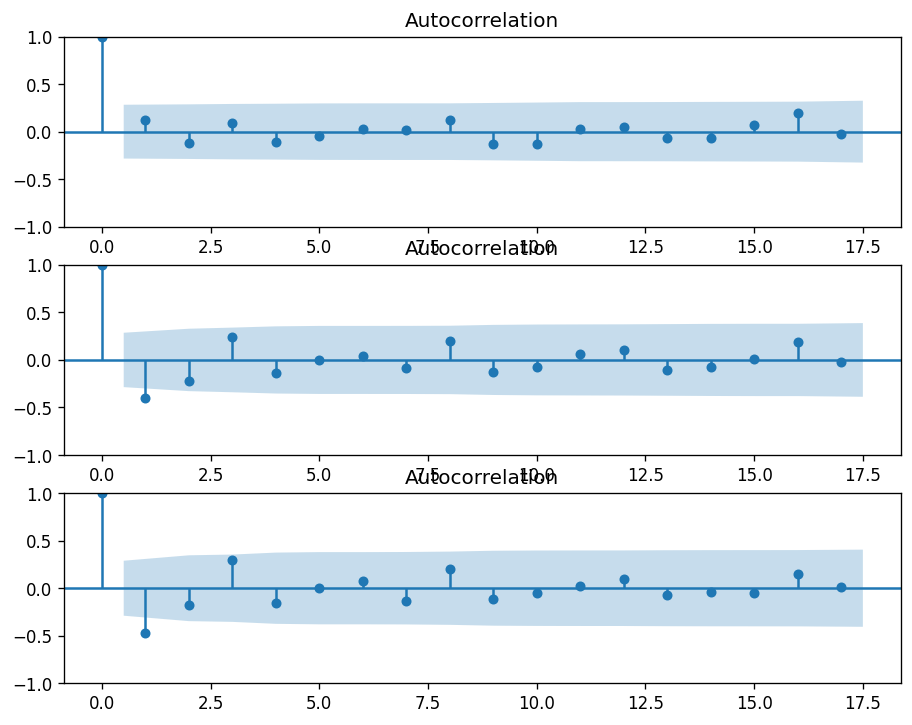

In [ ]:
# Step 3: plot ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(sales_time_series_downsampled.Sales, ax=ax1)
plot_acf(sales_time_series_downsampled.Sales.diff().dropna(), ax=ax2)
plot_acf(sales_time_series_downsampled.Sales.diff().diff().dropna(), ax=ax3)

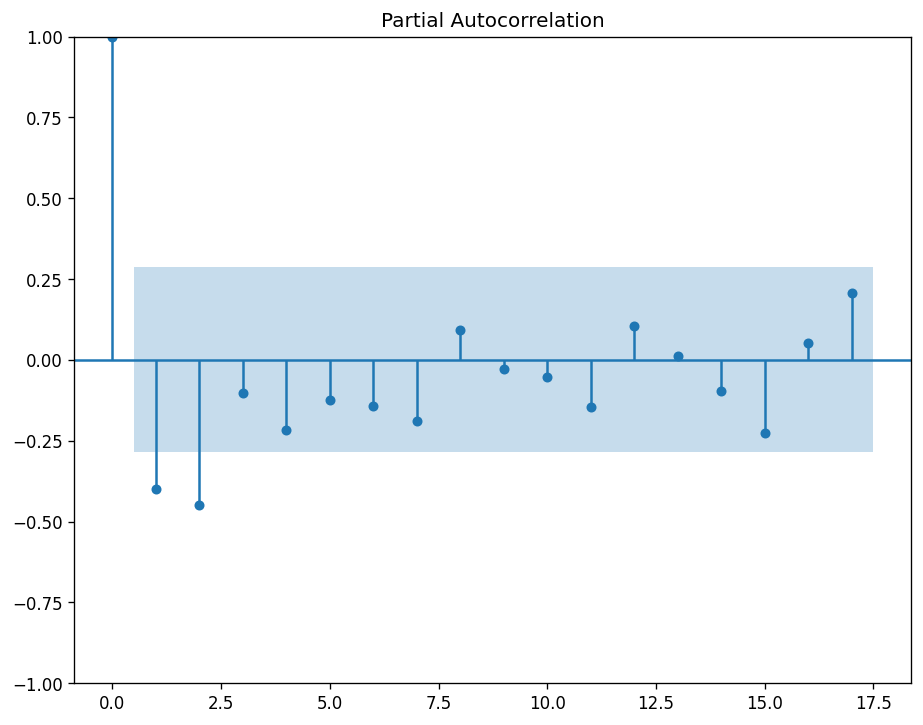

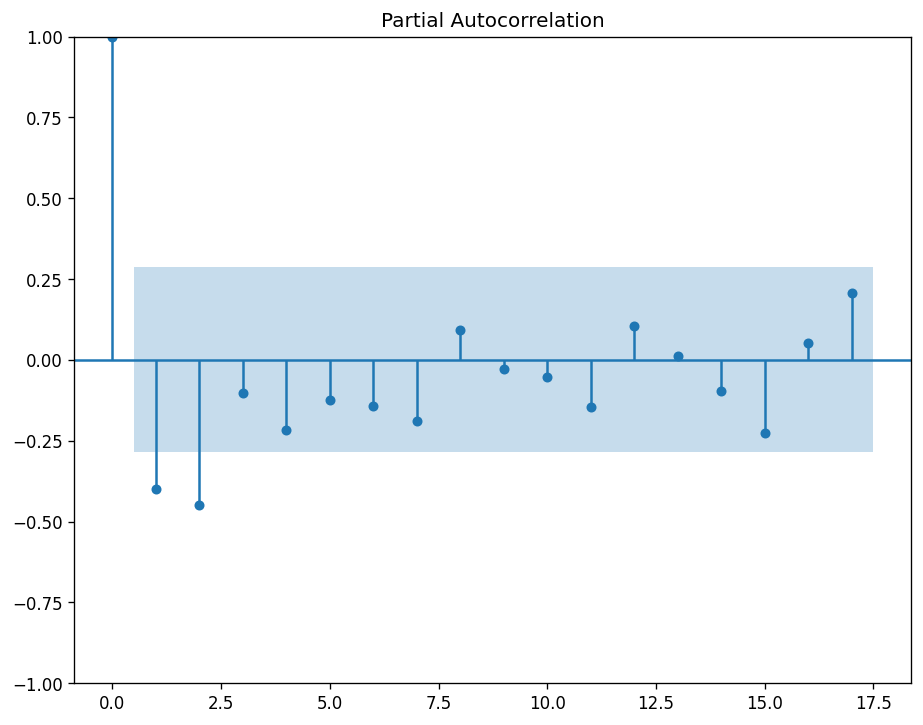

In [ ]:
# Finding the value of the p parameter

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sales_time_series_downsampled.Sales.diff().dropna())

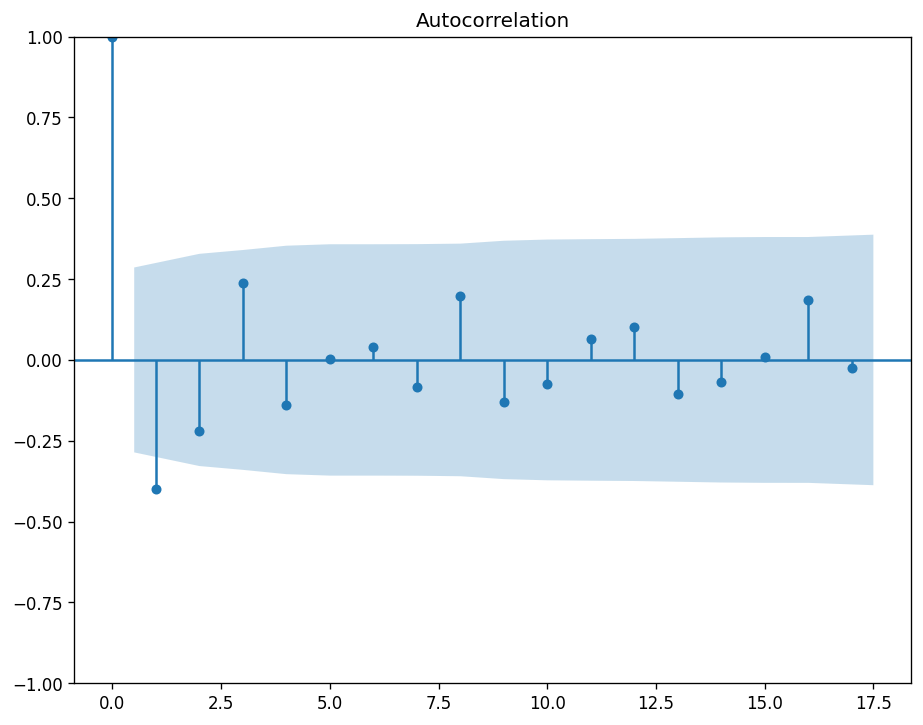

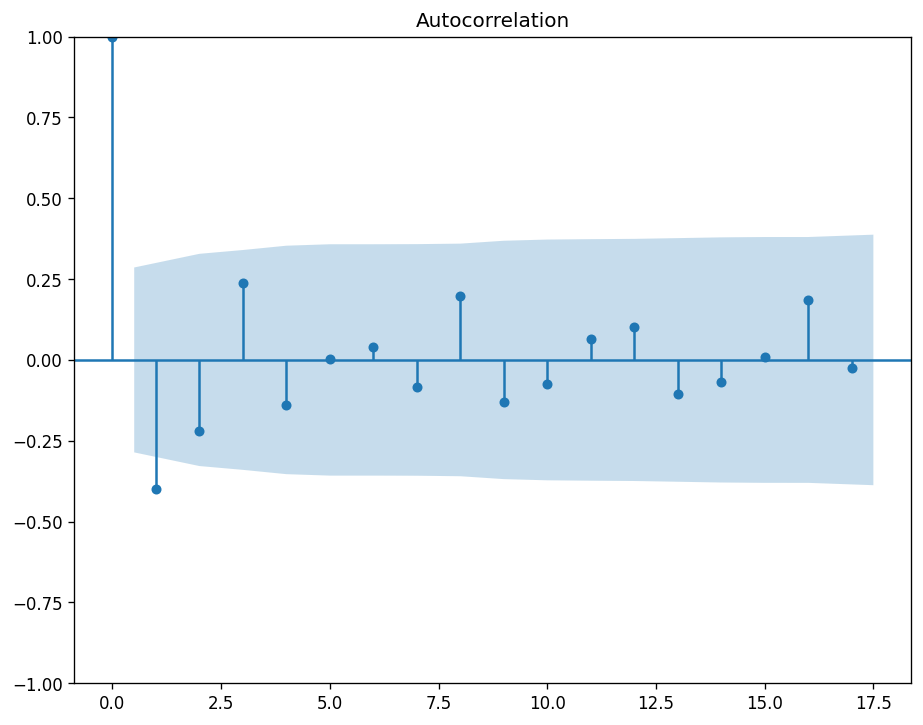

In [ ]:
# Finding the value of the q parameter
plot_acf(sales_time_series_downsampled.Sales.diff().dropna())

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit = auto_arima(sales_time_series_downsampled.Sales, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=393.555, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=389.520, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=390.789, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=390.484, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=612.639, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=390.388, Time=1.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.745 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -192.760
Date:                Thu, 02 May 2024   AIC                            389.520
Time:                        20:36:39   BIC                            393.262
Sample:                    01-31-2014   HQIC                           390.934
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    139.3887      2.269     61.431      0.000     134.941     143.836
sigma2       180.1487     22.699      7.936      0.000     135.660     224.638
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                69.70
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -1.40
Prob(H) (two-sided):                  0.12   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Step 4: Build the ARIMA model

model = ARIMA(sales_time_series_downsampled['Sales'], order=(0,1,0))
arima_model = model.fit()


# Step 5: Predict
forecast = arima_model.predict()


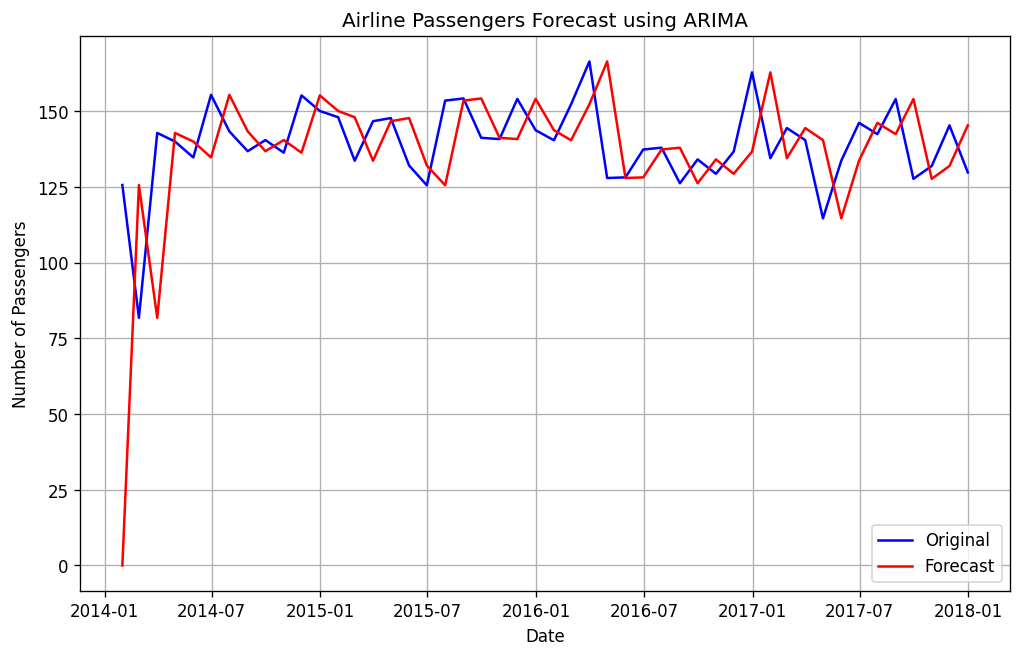

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_time_series_downsampled.index,sales_time_series_downsampled['Sales'], label='Original', color='blue')
plt.plot(sales_time_series_downsampled.index ,  forecast, label='Forecast', color='red')
plt.title('Airline Passengers Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
sales_time_series_downsampled.head()



,Sales
Order Date,
2014-01-31,125.677532
2014-02-28,81.795696
2014-03-31,142.873478
2014-04-30,140.038081
2014-05-31,134.785861


In [ ]:
sales_time_series_downsampled.tail()


,Sales
Order Date,
2017-08-31,154.082486
2017-09-30,127.707412
2017-10-31,131.965806
2017-11-30,145.376375
2017-12-31,129.836054


In [213]:
start_index = '2015-1-31'
end_index = '2020-12-1'
forecast = arima_model.predict(start=start_index, end=end_index , dynamic=False)

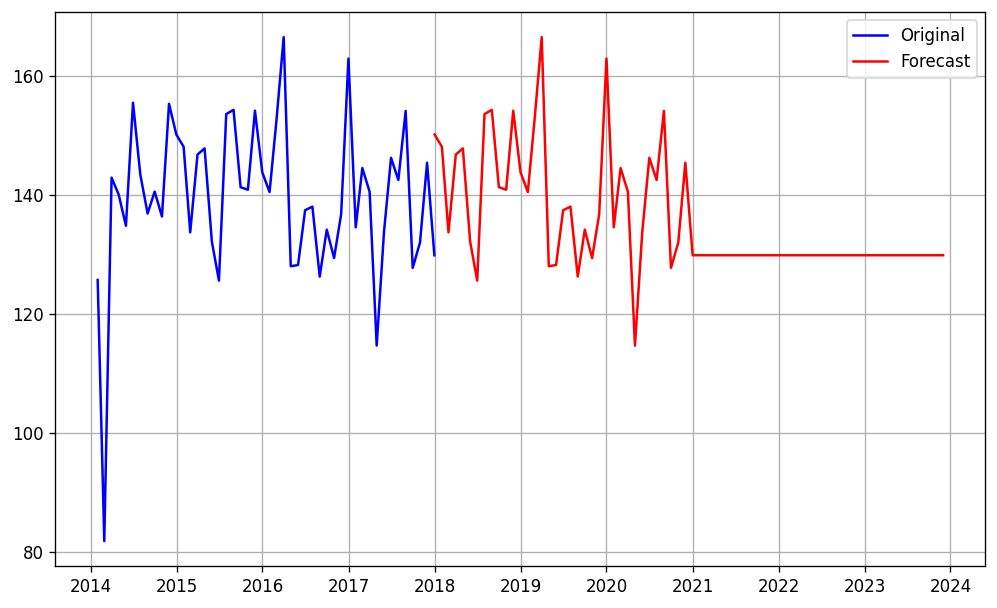

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_time_series_downsampled.index, sales_time_series_downsampled['Sales'], label='Original', color='blue')
plt.plot(pd.date_range(start=sales_time_series_downsampled.index[-1], periods=len(forecast), freq='MS'), forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.grid(True)
plt.show()